<a href="https://colab.research.google.com/github/k1ran242/kiran/blob/main/Churn%20Classification%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


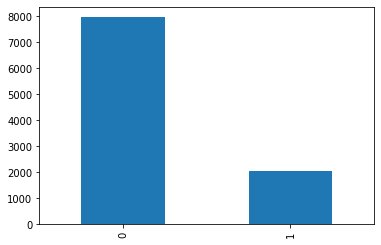

In [3]:
dataset['Exited'].value_counts().plot(kind='bar')

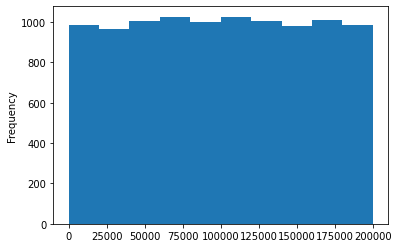

In [4]:
dataset.EstimatedSalary.plot(kind='hist')

In [5]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
dummies=pd.get_dummies(dataset[['Geography','Gender']],drop_first=True)

In [7]:
dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [8]:
df=dataset.drop(['Geography','Gender','RowNumber','CustomerId','Surname'],axis=1)

In [10]:
df=pd.concat([df,dummies],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [12]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
X_train.shape

(8000, 11)

In [17]:
model=Sequential()

In [21]:
# Adding the input layer and the first hidden layer
model.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 20, epochs = 150,validation_data=(X_test,y_test))

Epoch 1/150
268/268 [==============================] - 15s 4ms/step - loss: 0.5987 - accuracy: 0.7045 - val_loss: 0.4961 - val_accuracy: 0.7864
Epoch 2/150
268/268 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7898 - val_loss: 0.4703 - val_accuracy: 0.7933
Epoch 3/150
268/268 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.7914 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 4/150
268/268 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.7933 - val_loss: 0.4527 - val_accuracy: 0.7955
Epoch 5/150
268/268 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7963 - val_loss: 0.4479 - val_accuracy: 0.7955
Epoch 6/150
268/268 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7961 - val_loss: 0.4449 - val_accuracy: 0.7955
Epoch 7/150
268/268 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.7961 - val_loss: 0.4421 - val_accuracy: 0.795

In [25]:
losses=pd.DataFrame(model.history.history)

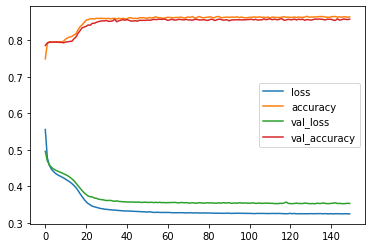

In [26]:
losses.plot()

In [33]:
###Visualize seperatly

***Visualize Seperatly***

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


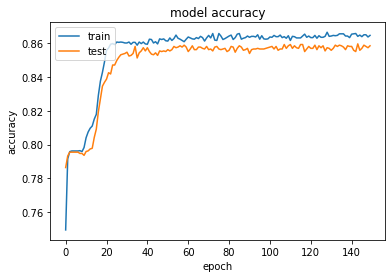

In [29]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

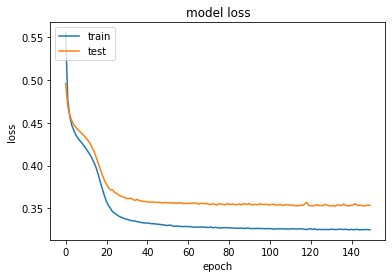

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

[[1505   90]
 [ 194  211]]
